In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [4]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=7)

In [6]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]

In [7]:
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.28347
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28347	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50935
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.03907	validation_1-error:0.26772	validation_1-logloss:0.72573
[72]	validation_0-error:0.00000	validation_0-logloss:0.03835	validation_1-error:0.26772	validation_1-logloss:0.72761
[73]	validation_0-error:0.00000	validation_0-logloss:0.03762	validation_1-error:0.26772	validation_1-logloss:0.72992
[74]	validation_0-error:0.00000	validation_0-logloss:0.03719	validation_1-error:0.26772	validation_1-logloss:0.73336
[75]	validation_0-error:0.00000	validation_0-logloss:0.03669	validation_1-error:0.26772	validation_1-logloss:0.73445
[76]	validation_0-error:0.00000	validation_0-logloss:0.03632	validation_1-error:0.26772	validation_1-logloss:0.73794
[77]	validation_0-error:0.00000	validation_0-logloss:0.03587	validation_1-error:0.27165	validation_1-logloss:0.74054
[78]	validation_0-error:0.00000	validation_0-logloss:0.03521	validation_1-error:0.26772	validation_1-logloss:0.74512
[79]	validation_0-error:0.00000	validation_0-logloss:0.03464	val

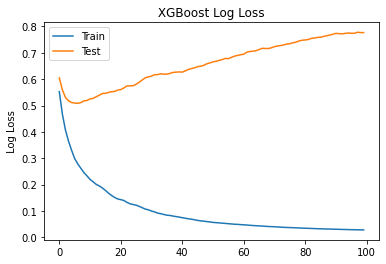

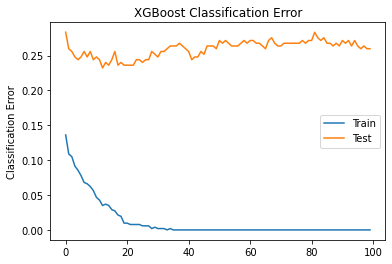

In [11]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

dataset = loadtxt('pima-indians-diabetes.csv',delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=7)
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train,eval_metric=["error","logloss"],eval_set=eval_set,verbose=True)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.0))

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0,epochs)

fig, ax = pyplot.subplots()
ax.plot(x_axis, results[ 'validation_0' ][ 'logloss' ], label= 'Train' )
ax.plot(x_axis, results[ 'validation_1' ][ 'logloss' ], label= 'Test' )
ax.legend()
pyplot.ylabel( ' Log Loss ' )
pyplot.title( ' XGBoost Log Loss ' )
pyplot.show()
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'],label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [12]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]

In [13]:
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.60491
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50935
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54546
[15]	validation_0-logloss:0.54613
[16]	validation_0-logloss:0.54982
Stopping. Best iteration:
[6]	validation_0-logloss:0.50818



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
predictions = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 74.41%
